In [1224]:
library(data.table)

In [1225]:
library(ggplot2)

In [1226]:
i = 1:55

In [1227]:
n = 55

# Hypothesis 1

In [1228]:
entity_edits_and_misalignment_hypothesis_1 <- read.table("../../../results/entity_categorization/hypothesis_1.tsv", header=TRUE, sep="\t")

In [1229]:
entity_edits_and_misalignment_hypothesis_1 <- data.table(entity_edits_and_misalignment_hypothesis_1)

In [1230]:
summary(entity_edits_and_misalignment_hypothesis_1)

   file_date      misaligned_automated_edits misaligned_human_edits
 Min.   :201211   Min.   :       14          Min.   :   29841      
 1st Qu.:201379   1st Qu.: 20230804          1st Qu.: 2931126      
 Median :201502   Median : 64895288          Median : 8438544      
 Mean   :201474   Mean   : 58304090          Mean   : 8257848      
 3rd Qu.:201604   3rd Qu.: 89122350          3rd Qu.:13567950      
 Max.   :201706   Max.   :118636421          Max.   :17426097      
 aligned_automated_edits aligned_human_edits
 Min.   :     659        Min.   : 192969    
 1st Qu.:46635152        1st Qu.:2203867    
 Median :49932888        Median :7359292    
 Mean   :46256089        Mean   :5782321    
 3rd Qu.:56198915        3rd Qu.:8845644    
 Max.   :68543158        Max.   :9345686    

In [1231]:
# Remove last entry since edit data from last month is only for (part of?) first day
sorted_entity_edits_and_misalignment_hypothesis_1 <- dplyr::arrange(entity_edits_and_misalignment_hypothesis_1, file_date)[1:55,]

In [1232]:
head(sorted_entity_edits_and_misalignment_hypothesis_1)

file_date,misaligned_automated_edits,misaligned_human_edits,aligned_automated_edits,aligned_human_edits
201211,14,29841,659,192969
201212,20866,177983,176427,206181
201301,196669,216888,1878629,321667
201302,472093,299379,3764987,409579
201303,738407,427357,5659279,554633
201304,2044821,618928,11769727,749096


In [1233]:
misaligned_automated_edits = data.table(i = i, n = n)

In [1234]:
misaligned_automated_edits$p <- (sorted_entity_edits_and_misalignment_hypothesis_1$misaligned_automated_edits/(sorted_entity_edits_and_misalignment_hypothesis_1$misaligned_automated_edits + sorted_entity_edits_and_misalignment_hypothesis_1$misaligned_human_edits))

In [1235]:
misaligned_automated_edits$se = sqrt((p*(1-p))/n)

Warning message in `[<-.data.table`(x, j = name, value = value):
“Supplied 100 items to be assigned to 55 items of column 'se' (45 unused)”

In [1236]:
aligned_automated_edits = data.table(i = i, n = n)

In [1237]:
aligned_automated_edits$p <- (sorted_entity_edits_and_misalignment_hypothesis_1$aligned_automated_edits/(sorted_entity_edits_and_misalignment_hypothesis_1$aligned_automated_edits + sorted_entity_edits_and_misalignment_hypothesis_1$aligned_human_edits))

In [1238]:
aligned_automated_edits$se = sqrt((p*(1-p))/n)

Warning message in `[<-.data.table`(x, j = name, value = value):
“Supplied 100 items to be assigned to 55 items of column 'se' (45 unused)”

In [1239]:
misaligned_automated_edits$group = "misaligned_automated"
aligned_automated_edits$group = "aligned_automated"

In [1240]:
grouped_hypothesis_1.dt = rbind(misaligned_automated_edits, aligned_automated_edits)

In [1241]:
grouped_hypothesis_1.dt$group = factor(grouped_hypothesis_1.dt$group)

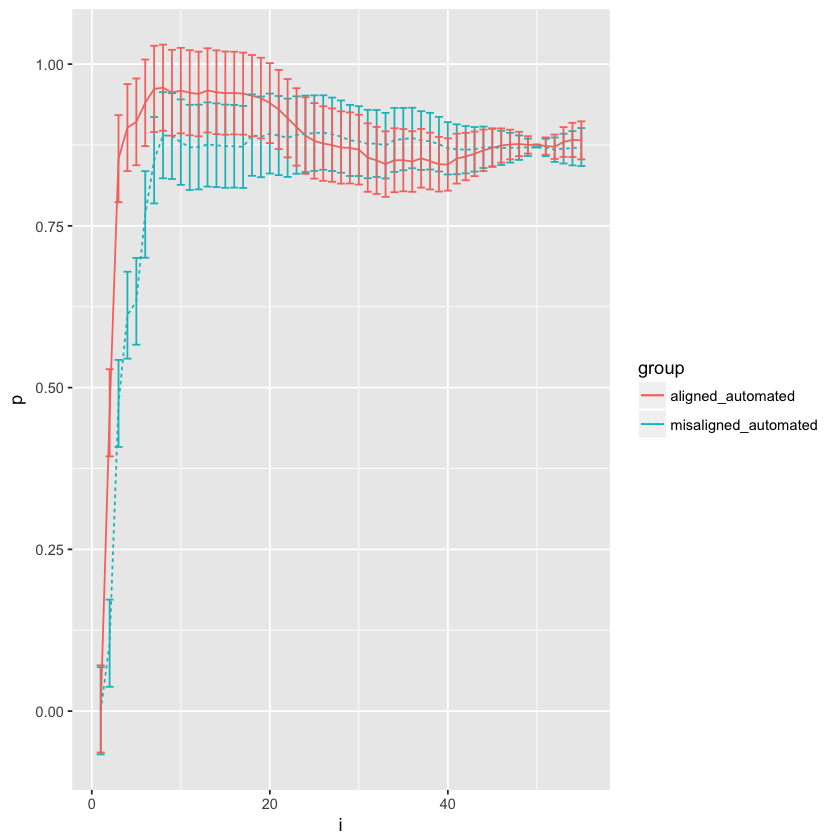

In [1242]:
ggplot(grouped_hypothesis_1.dt, aes(x=i, y=p, color=group, linetype=group)) + geom_line() + geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)

# Hypothesis 2

In [1243]:
entity_edits_and_misalignment_hypothesis_2 <- read.table("../../../results/entity_categorization/hypothesis_2.tsv", header=TRUE, sep="\t")

In [1244]:
entity_edits_and_misalignment_hypothesis_2 <- data.table(entity_edits_and_misalignment_hypothesis_2)

In [1245]:
summary(entity_edits_and_misalignment_hypothesis_2)

   file_date      lower_quality_automated_edits lower_quality_human_edits
 Min.   :201211   Min.   :      659             Min.   :  192969         
 1st Qu.:201379   1st Qu.: 52346325             1st Qu.: 3631146         
 Median :201502   Median : 65013086             Median :11856122         
 Mean   :201474   Mean   : 66157067             Mean   :12448471         
 3rd Qu.:201604   3rd Qu.: 90158301             3rd Qu.:21293344         
 Max.   :201706   Max.   :118004883             Max.   :27455757         
 higher_quality_automated_edits higher_quality_human_edits
 Min.   :      0                Min.   :      0           
 1st Qu.:   5982                1st Qu.:  13300           
 Median : 135382                Median : 115447           
 Mean   :1183604                Mean   : 681361           
 3rd Qu.:2275923                3rd Qu.:1219584           
 Max.   :4760905                Max.   :2686662           

In [1246]:
# Remove last entry since edit data from last month is only for (part of?) first day
sorted_entity_edits_and_misalignment_hypothesis_2 <- dplyr::arrange(entity_edits_and_misalignment_hypothesis_2, file_date)[1:55,]

In [1247]:
head(sorted_entity_edits_and_misalignment_hypothesis_2)

file_date,lower_quality_automated_edits,lower_quality_human_edits,higher_quality_automated_edits,higher_quality_human_edits
201211,659,192969,0,0
201212,176480,208114,0,0
201301,1878714,325059,0,0
201302,3765149,416095,0,0
201303,5660023,574968,0,0
201304,11849883,907567,0,0


In [1248]:
aligned_higher_quality_human_edits = data.table(i = i, n = n)

In [1249]:
aligned_higher_quality_human_edits$p <- (sorted_entity_edits_and_misalignment_hypothesis_2$higher_quality_human_edits/(sorted_entity_edits_and_misalignment_hypothesis_2$higher_quality_human_edits + sorted_entity_edits_and_misalignment_hypothesis_2$higher_quality_automated_edits))

In [1250]:
aligned_higher_quality_human_edits$se = sqrt((p*(1-p))/n)

Warning message in `[<-.data.table`(x, j = name, value = value):
“Supplied 100 items to be assigned to 55 items of column 'se' (45 unused)”

In [1251]:
aligned_lower_quality_human_edits = data.table(i = i, n = n)

In [1252]:
aligned_lower_quality_human_edits$p <- (sorted_entity_edits_and_misalignment_hypothesis_2$lower_quality_human_edits/(sorted_entity_edits_and_misalignment_hypothesis_2$lower_quality_human_edits + sorted_entity_edits_and_misalignment_hypothesis_2$lower_quality_automated_edits))

In [1253]:
aligned_lower_quality_human_edits$se = sqrt((p*(1-p))/n)

Warning message in `[<-.data.table`(x, j = name, value = value):
“Supplied 100 items to be assigned to 55 items of column 'se' (45 unused)”

In [1254]:
aligned_higher_quality_human_edits$group = "aligned_higher_quality_human_edits"
aligned_lower_quality_human_edits$group = "aligned_lower_quality_human_edits"

In [1255]:
grouped_hypothesis_2.dt = rbind(aligned_higher_quality_human_edits, aligned_lower_quality_human_edits)

In [1256]:
grouped_hypothesis_2.dt$group = factor(grouped_hypothesis_2.dt$group)

Warning message:
“Removed 7 rows containing missing values (geom_path).”Warning message:
“Removed 7 rows containing missing values (geom_errorbar).”

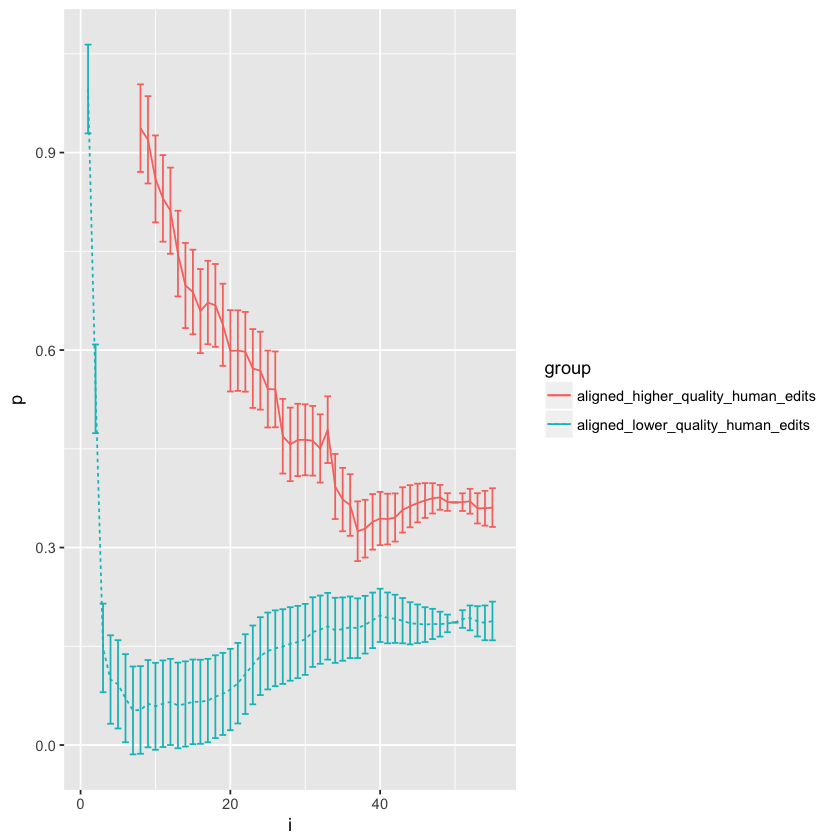

In [1257]:
ggplot(grouped_hypothesis_2.dt, aes(x=i, y=p, color=group, linetype=group)) + geom_line() + geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)

# Hypothesis 3

In [1258]:
entity_edits_and_misalignment_hypothesis_3 <- read.table("../../../results/entity_categorization/hypothesis_3.tsv", header=TRUE, sep="\t")

In [1259]:
entity_edits_and_misalignment_hypothesis_3 <- data.table(entity_edits_and_misalignment_hypothesis_3)

In [1260]:
summary(entity_edits_and_misalignment_hypothesis_3)

   file_date      lower_quality_automated_edits lower_quality_human_edits
 Min.   :201211   Min.   :       41             Min.   :   71535         
 1st Qu.:201379   1st Qu.: 29322858             1st Qu.: 4711318         
 Median :201502   Median : 86924298             Median :15684227         
 Mean   :201474   Mean   : 82119909             Mean   :18106306         
 3rd Qu.:201604   3rd Qu.:127555110             3rd Qu.:31310035         
 Max.   :201706   Max.   :170657591             Max.   :43118232         
 higher_quality_automated_edits higher_quality_human_edits
 Min.   :       0               Min.   :      0           
 1st Qu.:  672229               1st Qu.: 137820           
 Median : 2088980               Median : 505702           
 Mean   : 7308125               Mean   :1265076           
 3rd Qu.:14101160               3rd Qu.:2366700           
 Max.   :25984870               Max.   :4470438           

In [1261]:
# Remove last entry since edit data from last month is only for (part of?) first day
sorted_entity_edits_and_misalignment_hypothesis_3 <- dplyr::arrange(entity_edits_and_misalignment_hypothesis_3, file_date)[1:55,]

In [1262]:
head(sorted_entity_edits_and_misalignment_hypothesis_3)

file_date,lower_quality_automated_edits,lower_quality_human_edits,higher_quality_automated_edits,higher_quality_human_edits
201211,41,71535,0,0
201212,37648,260704,0,0
201301,291516,316846,0,0
201302,697858,411813,0,0
201303,1073080,608390,1,391
201304,2958710,1116553,13,474


In [1263]:
misaligned_higher_quality_human_edits = data.table(i = i, n = n)

In [1264]:
misaligned_higher_quality_human_edits$p <- (sorted_entity_edits_and_misalignment_hypothesis_3$higher_quality_human_edits/(sorted_entity_edits_and_misalignment_hypothesis_3$higher_quality_human_edits + sorted_entity_edits_and_misalignment_hypothesis_3$higher_quality_automated_edits))

In [1265]:
misaligned_higher_quality_human_edits$se = sqrt((p*(1-p))/n)

Warning message in `[<-.data.table`(x, j = name, value = value):
“Supplied 100 items to be assigned to 55 items of column 'se' (45 unused)”

In [1266]:
misaligned_lower_quality_human_edits = data.table(i = i, n = n)

In [1267]:
misaligned_lower_quality_human_edits$p <- (sorted_entity_edits_and_misalignment_hypothesis_3$lower_quality_human_edits/(sorted_entity_edits_and_misalignment_hypothesis_3$lower_quality_human_edits + sorted_entity_edits_and_misalignment_hypothesis_3$lower_quality_automated_edits))

In [1268]:
misaligned_lower_quality_human_edits$se = sqrt((p*(1-p))/n)

Warning message in `[<-.data.table`(x, j = name, value = value):
“Supplied 100 items to be assigned to 55 items of column 'se' (45 unused)”

In [1269]:
misaligned_higher_quality_human_edits$group = "misaligned_higher_quality_human_edits"
misaligned_lower_quality_human_edits$group = "misaligned_lower_quality_human_edits"

In [1270]:
grouped_hypothesis_3.dt = rbind(misaligned_higher_quality_human_edits, misaligned_lower_quality_human_edits)

In [1271]:
grouped_hypothesis_3.dt$group = factor(grouped_hypothesis_3.dt$group)

Warning message:
“Removed 4 rows containing missing values (geom_path).”Warning message:
“Removed 4 rows containing missing values (geom_errorbar).”

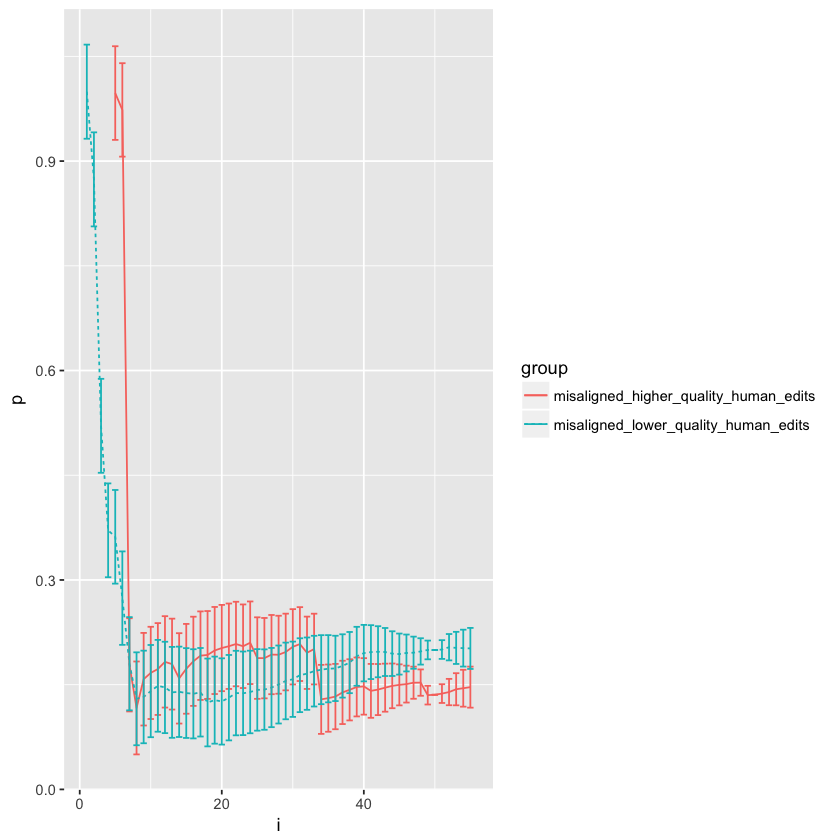

In [1272]:
ggplot(grouped_hypothesis_3.dt, aes(x=i, y=p, color=group, linetype=group)) + geom_line() + geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)

# Hypotheses 4 and 5

In [1273]:
grouped_hypothesis_4.dt = rbind(misaligned_higher_quality_human_edits, aligned_higher_quality_human_edits)

In [1274]:
grouped_hypothesis_4.dt$group = factor(grouped_hypothesis_4.dt$group)

Warning message:
“Removed 11 rows containing missing values (geom_path).”Warning message:
“Removed 11 rows containing missing values (geom_errorbar).”

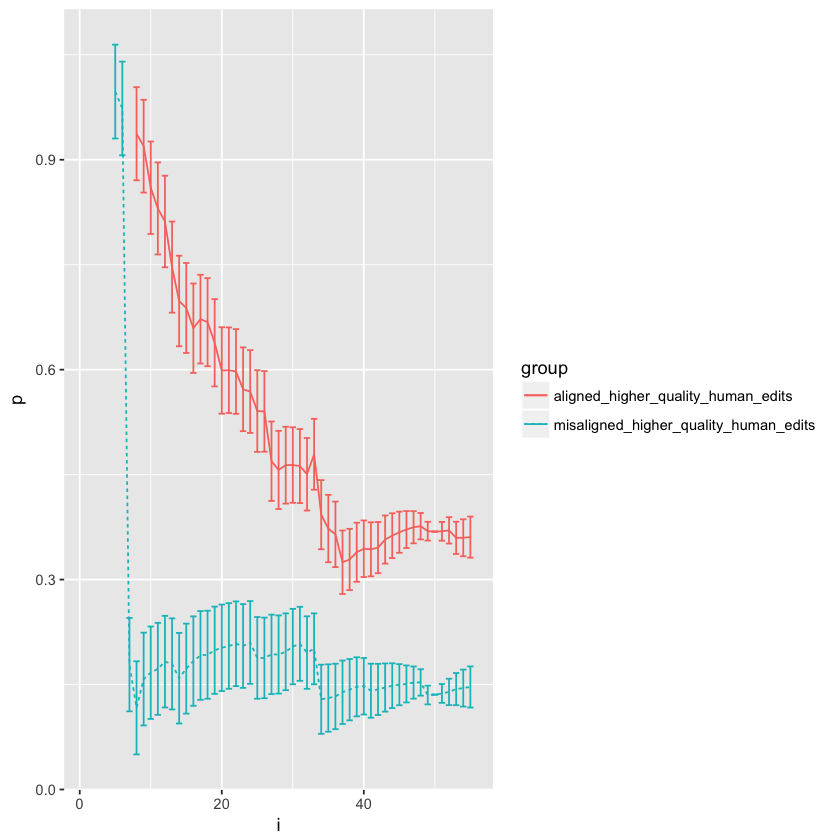

In [1275]:
ggplot(grouped_hypothesis_4.dt, aes(x=i, y=p, color=group, linetype=group)) + geom_line() + geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)

In [1276]:
grouped_hypothesis_5.dt = rbind(misaligned_lower_quality_human_edits, aligned_lower_quality_human_edits)

In [1277]:
grouped_hypothesis_5.dt$group = factor(grouped_hypothesis_5.dt$group)

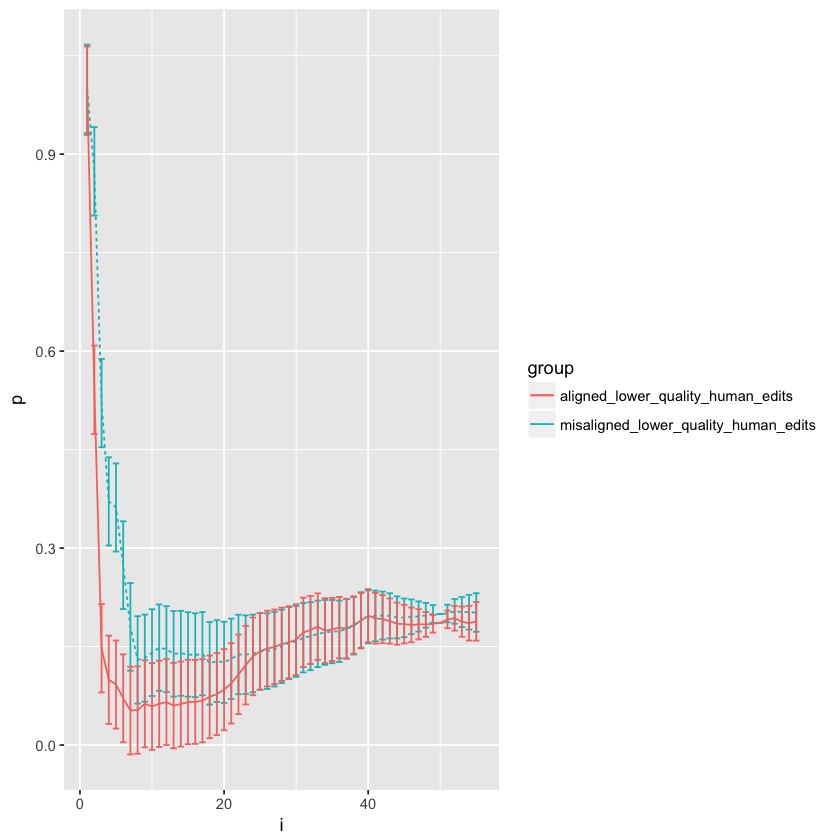

In [1278]:
ggplot(grouped_hypothesis_5.dt, aes(x=i, y=p, color=group, linetype=group)) + geom_line() + geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)